# Ensemble: DNN with Keras 




## Setup

In [2]:
%matplotlib inline

import math, time, random, datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import make_scorer, accuracy_score

#from sklearn.svm import LinearSVC
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

#from sklearn.model_selection import GridSearchCV

# Neural networks
import tensorflow as  tf
import keras

from keras.models import Sequential
from keras.utils import np_utils
from keras import layers
from keras import regularizers

#from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


## Loading data



In [3]:
df_train = pd.read_csv('data/df_train_dp.csv')
df_test = pd.read_csv('data/df_test_dp.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

df_train.head()

,PassengerId,Survived,SibSp,Parch,Isfemale,Age_fill,Ischild,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,0.0,0,0.741556,0,0.225126,0,0,1,0,0,1
1,2,1,1,0.0,1,1.291367,0,2.213478,1,0,0,1,0,0
2,3,1,0,0.0,1,0.879009,0,0.246086,0,0,1,0,0,1
3,4,1,1,0.0,1,1.188277,0,1.648853,0,0,1,1,0,0
4,5,0,0,0.0,0,1.188277,0,0.249967,0,0,1,0,0,1


In [4]:
df_test.head()

,PassengerId,SibSp,Parch,Isfemale,Age_fill,Ischild,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0,0.00000,0,1.175411,0,0.220206,0,1,0,0,0,1
1,893,1,0.00000,1,1.603394,0,0.196884,0,0,1,0,0,1
2,894,0,0.00000,0,2.116973,0,0.272473,0,1,0,0,1,0
3,895,0,0.00000,0,0.918622,0,0.243644,0,0,1,0,0,1
4,896,1,2.54878,1,0.747429,0,0.345602,0,0,1,0,0,1


## Prepare for ML

In [5]:
X_train = np.array(df_train.drop(['Survived', 'PassengerId'], axis=1))
y_train = np.array(df_train['Survived'])

X_test = np.array(df_test.drop(['PassengerId'], axis=1))


In [6]:
X_train.shape

(891, 12)

# DNN model with keras

In [7]:
def get_model():

    model = Sequential()
    model.add(layers.Dense(128,  kernel_regularizer=regularizers.l2(0.002), activation="relu",input_dim=X_train.shape[1]))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64,  kernel_regularizer=regularizers.l2(0.002), activation="relu"))    
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(16,  kernel_regularizer=regularizers.l2(0.002), activation="relu"))    
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(output_dim=1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [8]:
model = get_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)  

### Test run

In [9]:
X_train_, X_val_0, y_train_, y_val_0 = train_test_split(X_train, y_train, test_size=0.1,random_state=0)

#early_stopping_monitor = EarlyStopping(patience=15)

model = get_model()
_= model.fit(X_train_, y_train_, 
            batch_size = 100,
            epochs=200,
            verbose=1, 
            validation_data = (X_val_0, y_val_0)
            )
    
print(model.evaluate(X_val_0, y_val_0))

Instructions for updating:
Use tf.cast instead.
Train on 801 samples, validate on 90 samples
Epoch 1/200
801/801 [==============================] - 1s 672us/step - loss: 0.9628 - acc: 0.5156 - val_loss: 0.9216 - val_acc: 0.6444
Epoch 2/200
801/801 [==============================] - 0s 42us/step - loss: 0.9123 - acc: 0.6504 - val_loss: 0.8682 - val_acc: 0.6889
Epoch 3/200
801/801 [==============================] - 0s 34us/step - loss: 0.8695 - acc: 0.6729 - val_loss: 0.8232 - val_acc: 0.7111
Epoch 4/200
801/801 [==============================] - 0s 36us/step - loss: 0.8322 - acc: 0.6841 - val_loss: 0.7862 - val_acc: 0.7333
Epoch 5/200
801/801 [==============================] - 0s 35us/step - loss: 0.7967 - acc: 0.7066 - val_loss: 0.7577 - val_acc: 0.7444
Epoch 6/200
801/801 [==============================] - 0s 36us/step - loss: 0.7640 - acc: 0.7216 - val_loss: 0.7250 - val_acc: 0.7444
Epoch 7/200
801/801 [==============================] - 0s 36us/step - loss: 0.7436 - acc: 0.7291 - val

801/801 [==============================] - 0s 31us/step - loss: 0.5329 - acc: 0.8052 - val_loss: 0.4621 - val_acc: 0.8333
Epoch 60/200
801/801 [==============================] - 0s 30us/step - loss: 0.5215 - acc: 0.8277 - val_loss: 0.4570 - val_acc: 0.8111
Epoch 61/200
801/801 [==============================] - 0s 32us/step - loss: 0.4941 - acc: 0.8340 - val_loss: 0.4576 - val_acc: 0.8000
Epoch 62/200
801/801 [==============================] - 0s 30us/step - loss: 0.5000 - acc: 0.8252 - val_loss: 0.4540 - val_acc: 0.8111
Epoch 63/200
801/801 [==============================] - 0s 31us/step - loss: 0.5071 - acc: 0.8302 - val_loss: 0.4569 - val_acc: 0.8556
Epoch 64/200
801/801 [==============================] - 0s 31us/step - loss: 0.5147 - acc: 0.8127 - val_loss: 0.4595 - val_acc: 0.8111
Epoch 65/200
801/801 [==============================] - 0s 34us/step - loss: 0.5052 - acc: 0.8277 - val_loss: 0.4592 - val_acc: 0.8000
Epoch 66/200
801/801 [==============================] - 0s 32us/step

801/801 [==============================] - 0s 35us/step - loss: 0.4782 - acc: 0.8252 - val_loss: 0.4591 - val_acc: 0.8000
Epoch 120/200
801/801 [==============================] - 0s 34us/step - loss: 0.4755 - acc: 0.8365 - val_loss: 0.4627 - val_acc: 0.7889
Epoch 121/200
801/801 [==============================] - 0s 30us/step - loss: 0.4832 - acc: 0.8340 - val_loss: 0.4641 - val_acc: 0.8000
Epoch 122/200
801/801 [==============================] - 0s 37us/step - loss: 0.4704 - acc: 0.8277 - val_loss: 0.4621 - val_acc: 0.8000
Epoch 123/200
801/801 [==============================] - 0s 32us/step - loss: 0.4753 - acc: 0.8340 - val_loss: 0.4577 - val_acc: 0.8000
Epoch 124/200
801/801 [==============================] - 0s 31us/step - loss: 0.4769 - acc: 0.8340 - val_loss: 0.4520 - val_acc: 0.8000
Epoch 125/200
801/801 [==============================] - 0s 36us/step - loss: 0.4785 - acc: 0.8365 - val_loss: 0.4552 - val_acc: 0.8000
Epoch 126/200
801/801 [==============================] - 0s 34

801/801 [==============================] - 0s 32us/step - loss: 0.4757 - acc: 0.8227 - val_loss: 0.4547 - val_acc: 0.8000
Epoch 180/200
801/801 [==============================] - 0s 30us/step - loss: 0.4629 - acc: 0.8340 - val_loss: 0.4537 - val_acc: 0.8000
Epoch 181/200
801/801 [==============================] - 0s 30us/step - loss: 0.4543 - acc: 0.8414 - val_loss: 0.4424 - val_acc: 0.8000
Epoch 182/200
801/801 [==============================] - 0s 31us/step - loss: 0.4593 - acc: 0.8352 - val_loss: 0.4372 - val_acc: 0.8222
Epoch 183/200
801/801 [==============================] - 0s 29us/step - loss: 0.4595 - acc: 0.8277 - val_loss: 0.4417 - val_acc: 0.8111
Epoch 184/200
801/801 [==============================] - 0s 34us/step - loss: 0.4563 - acc: 0.8427 - val_loss: 0.4309 - val_acc: 0.7889
Epoch 185/200
801/801 [==============================] - 0s 29us/step - loss: 0.4587 - acc: 0.8390 - val_loss: 0.4304 - val_acc: 0.8111
Epoch 186/200
801/801 [==============================] - 0s 31

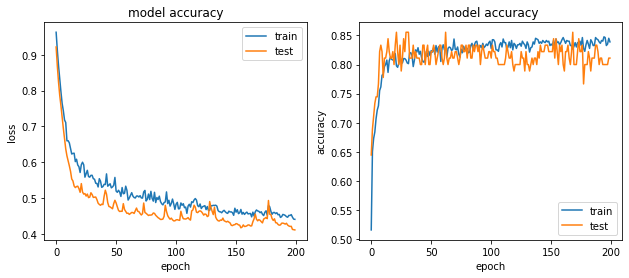

loss: 0.411   
Acc: 0.8111  


In [10]:
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.plot(_.history['loss'])
plt.plot(_.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(1, 3, 2)
plt.plot(_.history['acc'])
plt.plot(_.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

print("loss: {0:.3f}   ".format(_.history['val_loss'][-1]))
print("Acc: {0:.4f}  ".format(_.history['val_acc'][-1],))

### K-fold cross-validation
prediction of val and test of each run is saved out. val pred is used for soft voting to compare to pred mean. test pred is for soft voting then compare the kaggle score to a final run using train and val data.


In [11]:
start_time = time.time()
scores=[]
ps_test=[]
ps_val=[]

k_fold=10

for i in range(k_fold):
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train, y_train, test_size=0.1)
    
    model = get_model()

    model.fit(X_train_, y_train_, batch_size=100, epochs=200, verbose=0)

    score  = model.evaluate(X_val_, y_val_, verbose=0)
    
    proba_val=model.predict(X_val_0)
    
    proba_test=model.predict(X_test)
    
      
    print("acc_{cv:02d}: {acc:.4f} ".format(cv=i,acc=score[1]))
    
    scores.append(score[1])
    ps_val.append(np.reshape(proba_val,(-1,)))
    ps_test.append(np.reshape(proba_test,(-1,)))

run_time = (time.time() - start_time)
print("\nRunning Time: {}".format(datetime.timedelta(seconds=run_time)))

acc_00: 0.7778 
acc_01: 0.7667 
acc_02: 0.8333 
acc_03: 0.8444 
acc_04: 0.8222 
acc_05: 0.8111 
acc_06: 0.8556 
acc_07: 0.8222 
acc_08: 0.8444 
acc_09: 0.8111 

Running Time: 0:01:05.918356


### Mean acc vs ensemble acc

In [12]:
np.shape(ps_val)

(10, 90)

In [13]:
def ens_voting(x,vstr='soft',thr=0.5):
    if vstr=='hard':
        x=np.where(x>thr,1.0,0)
    return np.where(np.mean(x,axis=0)>thr,1,0)

In [14]:
pred_val_ens=ens_voting(ps_val)

acc_ens=accuracy_score(y_val_0, pred_val_ens)

print("\nacc_cv {0}-Fold: {acc_cv:.4f} +/- {std:.4f} ".format(k_fold,acc_cv=np.mean(scores), std=np.std(scores)))
print("\nacc_cv ensemble: {acc_ens:.4f} ".format(acc_ens=acc_ens))



acc_cv 10-Fold: 0.8189 +/- 0.0272 

acc_cv ensemble: 0.8333 


### Final run with all data

In [15]:
#train with all data

#early_stopping_monitor = EarlyStopping(patience=15)

model = get_model()
_= model.fit(X_train, y_train, 
            batch_size = 100,
            epochs=200,
            verbose=0, 
            validation_data = (X_val_0, y_val_0)
            )
    
print(model.evaluate(X_val_0, y_val_0))

90/90 [==============================] - 0s 115us/step
[0.3144035518169403, 0.8777777804268732]


## Prediction and Submission
make the prediction on the test dataset and submit the cvs file to kaggle.

In [16]:
X_test.shape

(418, 12)

In [23]:
pred_proba=model.predict(X_test).reshape([-1,])
pred=np.rint(pred_proba).astype(int)
pred_proba

array([0.09017161, 0.36660206, 0.04695651, 0.12127638, 0.33629704,
       0.13630104, 0.78081775, 0.10102063, 0.5670971 , 0.08969852,
       0.10760275, 0.31740108, 0.9813931 , 0.07080424, 0.98246574,
       0.96910197, 0.06681156, 0.18268189, 0.32055283, 0.53044176,
       0.6642393 , 0.93723416, 0.9716696 , 0.7528445 , 0.7984736 ,
       0.09389877, 0.96887004, 0.17441759, 0.41158596, 0.12467539,
       0.0769079 , 0.07145256, 0.31743735, 0.32121286, 0.6608768 ,
       0.19752449, 0.48546177, 0.47787675, 0.12394157, 0.41006032,
       0.12618506, 0.43720752, 0.10540125, 0.9202453 , 0.9804495 ,
       0.12144786, 0.28455243, 0.09486762, 0.9783989 , 0.4804387 ,
       0.4041164 , 0.14007652, 0.9069825 , 0.91606677, 0.12000799,
       0.07353681, 0.11197203, 0.12101695, 0.1065698 , 0.9925981 ,
       0.12886548, 0.09785831, 0.126982  , 0.77729   , 0.16142902,
       0.9307989 , 0.7754239 , 0.3346277 , 0.38207445, 0.2779706 ,
       0.7795812 , 0.12407297, 0.44669932, 0.40441537, 0.99010

In [18]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
pred_vote=ens_voting(ps_test)
pred_vote

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
output = pd.DataFrame({ 'PassengerId' : df_test['PassengerId'], 'Survived': pred })

output.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [26]:
output2 = pd.DataFrame({ 'PassengerId' : df_test['PassengerId'], 'Survived': pred_proba })

output2.head(20)

,PassengerId,Survived
0,892,0.090172
1,893,0.366602
2,894,0.046957
3,895,0.121276
4,896,0.336297
5,897,0.136301
6,898,0.780818
7,899,0.101021
8,900,0.567097
9,901,0.089699


In [27]:
output.to_csv('data/sub_titanic_ens_dnn.csv', index = False)
output2.to_csv('data/ens_proba_dnn.csv', index = False)

both voting prediction(pred_vote) and one-run-with-all-data(pred) prediction have the same kaggle score: 0.77990, however, they have different outputs.